In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv') # 모델 시험지 파일
submission = pd.read_csv('submission.csv') # 답안지 파일

In [3]:
train.shape

(1459, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [6]:
train[['hour', 'count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [7]:
import matplotlib.pyplot as plt

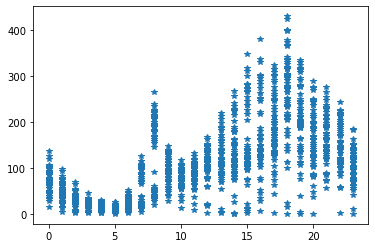

In [8]:
plt.plot('hour', 'count', '*', data = train)

In [9]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

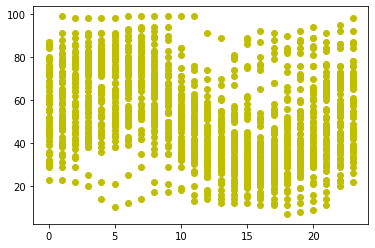

In [10]:
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

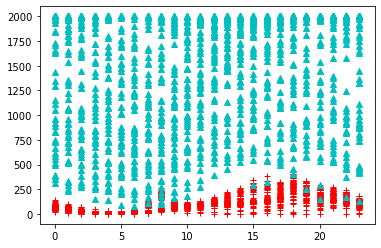

In [11]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

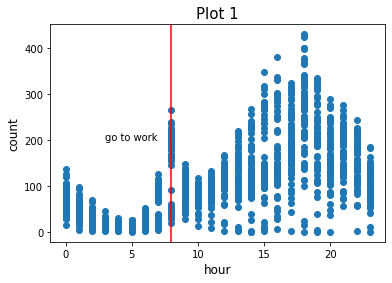

In [12]:
plt.title('Plot 1', fontsize = 15)
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png')

In [13]:
# correlation coefficient (상관계수)
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [14]:
import seaborn as sns

<AxesSubplot:>

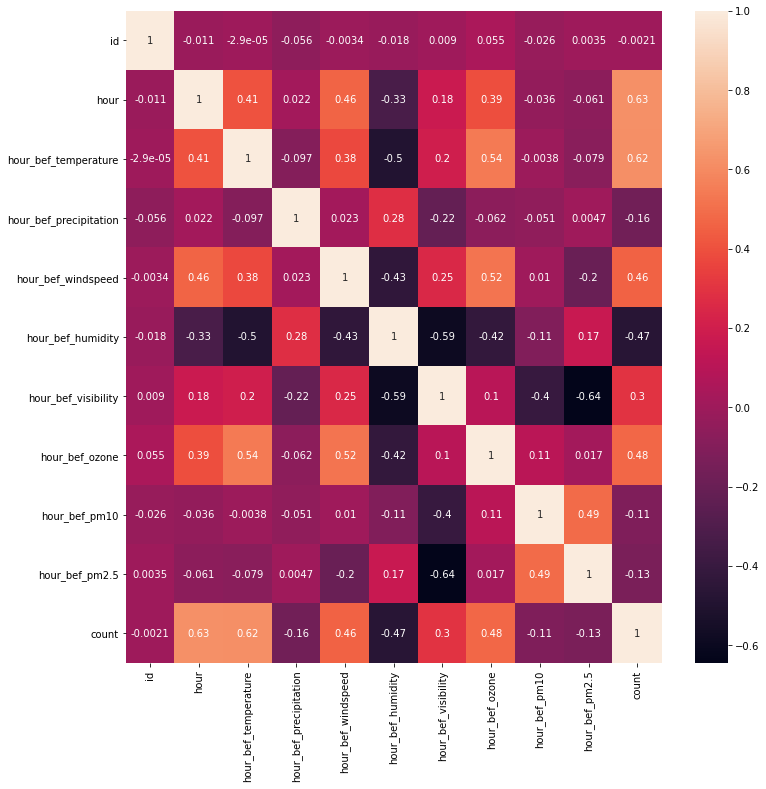

In [15]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

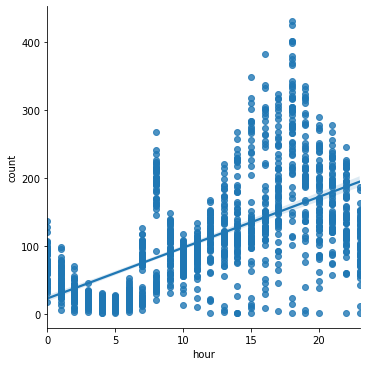

In [16]:
sns.lmplot(x = 'hour', y = 'count', data = train)

<AxesSubplot:ylabel='Frequency'>

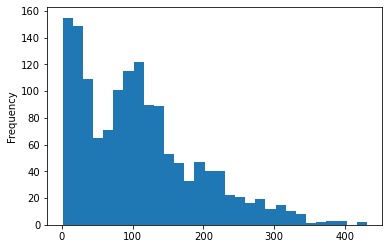

In [17]:
train['count'].plot(kind = 'hist', bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

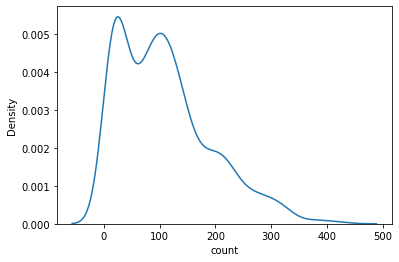

In [18]:
sns.kdeplot(train['count'])

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

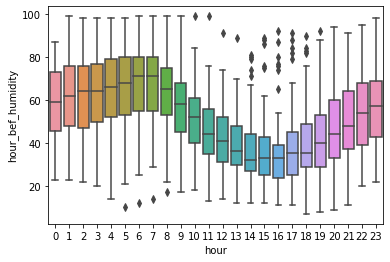

In [19]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

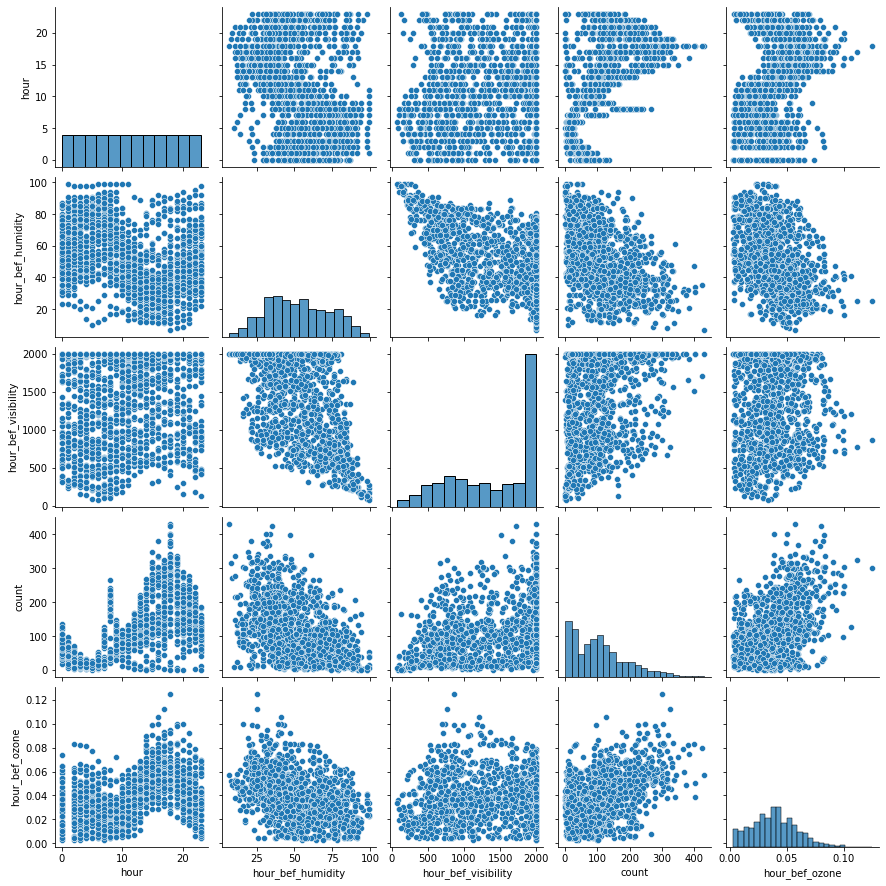

In [20]:
sns.pairplot(train[['hour', 'hour_bef_humidity',
                    'hour_bef_visibility', 'count', 'hour_bef_ozone']])

C:\Users\HEESU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


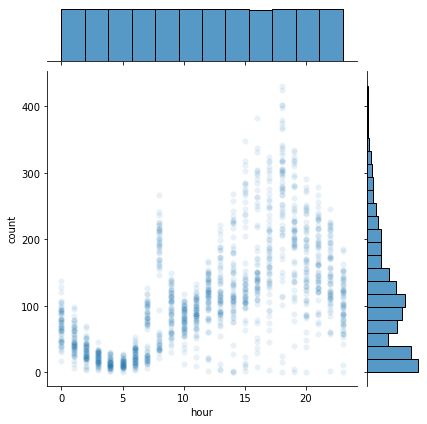

In [21]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

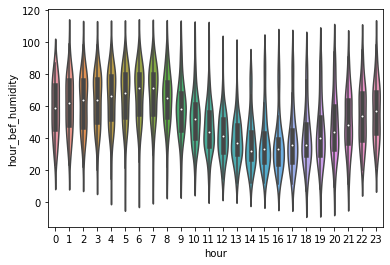

In [22]:
sns.violinplot(x = 'hour', y = 'hour_bef_humidity', data = train)

In [23]:
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


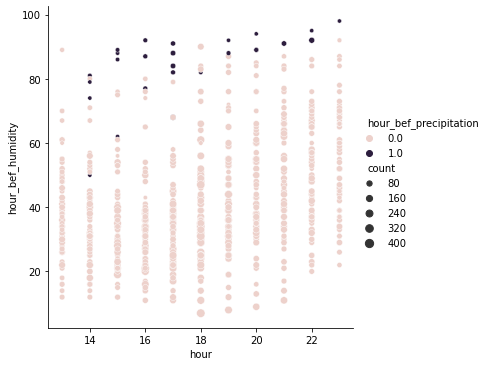

In [24]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', 
           size = 'count', data = train[train['hour'] > 12])

In [25]:
# N/A 여부
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [26]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [27]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [28]:
train_isna_sum = train.isna().sum()

In [29]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [30]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [31]:
def fill_bicycle_na(df, column):
    df[column] = df[column].fillna(value = df[column].mean())

In [32]:
fill_bicycle_na(train, 'hour_bef_precipitation')

In [33]:
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [34]:
test_isna_sum = test.isna().sum()

In [35]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [36]:
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [37]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [38]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [40]:
model = KNeighborsRegressor(n_jobs = -1)

In [173]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [182]:
# sns.displot(train['hour_bef_visibility'])

In [ ]:
# train['strong_wind'] = train['hour_bef_windspeed'].apply(lambda x: 1 if x > 5 else 0)
# test['strong_wind'] = test['hour_bef_windspeed'].apply(lambda x: 1 if x > 5 else 0)
# column = ['hour', 'hour_bef_temperature', 'strong_wind']
# X_train = train[column]
# y_train = train['count']
# X_test = test[column]

In [186]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,strong_wind,AMPM,high_visibility
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,PM,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,PM,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,AM,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,PM,0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,PM,1


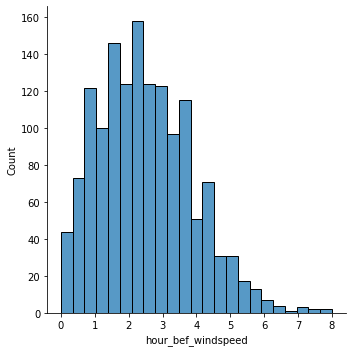

In [201]:
sns.displot(train['hour_bef_windspeed'])

In [208]:
train['proper_windspeed'] = train['hour_bef_windspeed'].apply(lambda x : 1 if 1<=x<=3 
                                                             else 0)
test['proper_windspeed'] = test['hour_bef_windspeed'].apply(lambda x : 1 if 1<=x<=3 
                                                             else 0)
train['high_visibility'] = train['hour_bef_visibility'].apply(lambda x : 1 if x > 1800
                                                             else 0)
test['high_visibility'] = test['hour_bef_visibility'].apply(lambda x : 1 if x > 1800
                                                             else 0)

column = ['hour', 'hour_bef_temperature', 'proper_windspeed', 'high_visibility']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [204]:
train['high_visibility'] = train['hour_bef_visibility'].apply(lambda x : 1 if x > 1800
                                                             else 0)
test['high_visibility'] = test['hour_bef_visibility'].apply(lambda x : 1 if x > 1800
                                                             else 0)

column = ['hour', 'hour_bef_temperature', 'high_visibility']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [170]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [171]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [209]:
# column = ['hour', 'hour_bef_temperature', 'proper_windspeed', 'high_visibility']
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2044.041690533352

In [205]:
# column = ['hour', 'hour_bef_temperature', 'high_visibility']
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2045.6213214706017

In [174]:
# column = ['hour', 'hour_bef_temperature']
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2154.4346238290263

In [175]:
# column = ['hour', 'hour_bef_temperature']
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2059.3699019701085

In [176]:
# column = ['hour', 'hour_bef_temperature']
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1993.3584133742238

In [47]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [48]:
submission['count'] = model_9.predict(X_test)

In [49]:
submission.to_csv('knn_9.csv', index = False)

In [50]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [51]:
submission['count'] = model.predict(X_test)

In [52]:
submission.to_csv('knn_5.csv', index = False)

In [53]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [55]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [56]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [57]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
RandomForestRegressor()

RandomForestRegressor()

In [60]:
param = {'min_samples_split': [30, 50, 70],
         'max_depth': [5, 6, 7],
         'n_estimators': [50, 150, 250]}

In [61]:
param

{'min_samples_split': [30, 50, 70],
 'max_depth': [5, 6, 7],
 'n_estimators': [50, 150, 250]}

In [62]:
gs = GridSearchCV(estimator=model, param_grid=param,
                 scoring = 'neg_mean_squared_error', cv = 3)

In [63]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [64]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [65]:
submission['count'] = gs.predict(X_test)

In [66]:
submission.to_csv('gridsearch.csv', index = False)

In [67]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 50}

In [68]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095292,0.002157,0.005652,4.704151e-04,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2076.377850,-1775.287254,-1814.178479,-1888.614528,133.714698,13
1,0.279696,0.001077,0.013630,4.704247e-04,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2087.741464,-1798.311547,-1756.066991,-1880.706667,147.408064,9
2,0.458478,0.002480,0.021046,5.502409e-04,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2105.110364,-1782.724989,-1798.102601,-1895.312651,148.482160,14
3,0.091347,0.000493,0.005681,4.927371e-04,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2187.741303,-1839.267576,-1817.146923,-1948.051934,169.726400,18
4,0.271383,0.002662,0.013921,8.497708e-04,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2145.659526,-1841.013988,-1790.371475,-1925.681663,156.915819,16
5,0.454716,0.003672,0.020080,6.778807e-04,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2152.456077,-1827.649118,-1820.040742,-1933.381979,154.939918,17
6,0.089182,0.000765,0.006004,1.431350e-05,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2255.356971,-1937.774168,-1864.820862,-2019.317334,169.541694,27
7,0.263972,0.003043,0.012904,8.911228e-04,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2250.725188,-1914.329368,-1832.089206,-1999.047921,181.102082,23
8,0.435762,0.003141,0.020664,5.585341e-04,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2270.907203,-1904.068571,-1847.416523,-2007.464099,187.712662,26
9,0.101844,0.002616,0.005896,1.244740e-04,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2039.586114,-1700.682611,-1768.163069,-1836.143931,146.469438,6


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [71]:
model = RandomForestRegressor()

In [72]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param,
                       n_iter = 30, random_state = 0, 
                        scoring = 'neg_mean_squared_error', n_jobs = -1)

In [73]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [74]:
rs.best_params_

{'n_estimators': 139, 'min_samples_split': 35, 'max_depth': 7}

In [75]:
submission['count'] = rs.predict(X_test)

In [76]:
submission.to_csv('randomsearch.csv', index = False)

In [77]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.359565,0.013649,0.012877,0.001553,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1644.185602,-1947.759939,-1567.368891,-1851.757249,-1516.735249,-1705.561386,166.464910,1
21,0.456686,0.007977,0.015960,0.001664,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1676.044028,-1961.560602,-1563.845639,-1828.823053,-1509.368844,-1707.928433,167.419929,2
29,0.199194,0.007978,0.008513,0.000451,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1714.069121,-1990.877030,-1617.254787,-1869.524218,-1510.226404,-1740.390312,172.191607,3
17,0.594806,0.021518,0.020358,0.002482,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1727.517315,-1980.955354,-1615.554131,-1859.735933,-1522.089806,-1741.170508,164.630963,4
19,0.148886,0.012896,0.009973,0.003732,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1739.078836,-1972.092567,-1635.547761,-1882.995117,-1490.057726,-1743.954401,171.824699,5
2,0.298451,0.062435,0.010092,0.001739,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1694.719481,-2006.037777,-1653.994818,-1890.447513,-1539.316213,-1756.903160,168.346766,6
6,0.182187,0.004086,0.008181,0.000977,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1744.742612,-2008.638775,-1662.184071,-1882.661982,-1502.694927,-1760.184473,174.856328,7
3,0.269861,0.010380,0.009976,0.002097,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1783.109226,-1997.594799,-1602.705116,-1900.967092,-1539.878809,-1764.851008,173.167204,8
18,0.446693,0.018102,0.019061,0.003333,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1732.440194,-1993.162937,-1674.861316,-1883.535762,-1542.642784,-1765.328599,157.947059,9
14,0.261125,0.007964,0.009977,0.001543,102,49,7,"{'n_estimators': 102, 'min_samples_split': 49,...",-1755.350457,-2018.447139,-1660.844220,-1897.836906,-1498.840959,-1766.263936,180.917265,10


In [78]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
submission['count'] = model.predict(X_test)

In [80]:
submission.to_csv('rf_default.csv', index = False)

In [81]:
model_100 = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 10)
model_200 = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 10)
model_300 = RandomForestRegressor(n_estimators = 300, n_jobs = -1, random_state = 10)
model_500 = RandomForestRegressor(n_estimators = 500, n_jobs = -1, random_state = 10)

<AxesSubplot:xlabel='n_estimators'>

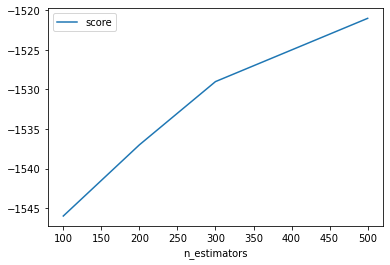

In [83]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 
              'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [88]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold,
                        scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1546.8865621858963
Wall time: 735 ms


In [89]:
%%time
score = cross_val_score(model_200, X_train, y_train, cv = kfold,
                        scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1537.2335820896296
Wall time: 1.33 s


In [90]:
%%time
score = cross_val_score(model_300, X_train, y_train, cv = kfold,
                        scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1529.93820386781
Wall time: 2.07 s


In [91]:
%%time
score = cross_val_score(model_500, X_train, y_train, cv = kfold,
                        scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1521.7993785402248
Wall time: 3.35 s


In [92]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1,
                                    random_state = 10, min_samples_split = 30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1,
                                    random_state = 10, min_samples_split = 50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1,
                                    random_state = 10, min_samples_split = 100)

In [93]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1647.5599150463906
Wall time: 2.62 s


In [94]:
%%time
score = cross_val_score(model_sam_50, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1746.5733867422455
Wall time: 2.35 s


In [95]:
%%time
score = cross_val_score(model_sam_100, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2009.2340561302196
Wall time: 2.27 s


In [96]:
final_model = RandomForestRegressor(n_estimators = 500, n_jobs = -1, 
                                   random_state = 10, min_samples_split = 30)

In [98]:
final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [99]:
submission['count'] = final_model.predict(X_test)

In [100]:
submission.to_csv('estimators_500_samples_30.csv', index = False)

<AxesSubplot:ylabel='Frequency'>

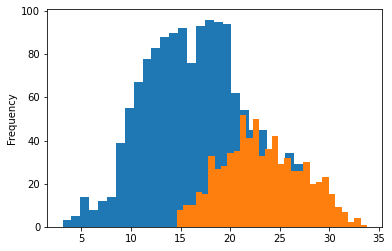

In [101]:
train['hour_bef_temperature'].plot(bins = 30, kind = 'hist')
test['hour_bef_temperature'].plot(bins = 30, kind = 'hist')

In [102]:
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state = 10,
                                  min_samples_split = 30, max_features = 0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state = 10,
                                  min_samples_split = 30, max_features = 0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state = 10,
                                  min_samples_split = 30, max_features = 0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state = 10,
                                  min_samples_split = 30, max_features = 0.8)

In [107]:
%%time
score = cross_val_score(rf_maxf_02, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2253.430187736337
Wall time: 2.2 s


In [108]:
%%time
score = cross_val_score(rf_maxf_04, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1830.923118087825
Wall time: 2.24 s


In [109]:
%%time
score = cross_val_score(rf_maxf_06, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1714.0867530230257
Wall time: 2.4 s


In [110]:
%%time
score = cross_val_score(rf_maxf_08, X_train, y_train, cv = kfold,
                       scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1673.7873632042495
Wall time: 2.48 s
